<a href="https://colab.research.google.com/github/maeosha/python/blob/lab5_var10/Lab5/Untitled1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
from torch.utils.data import TensorDataset, DataLoader
import torchvision
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import os

import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

from nltk.tokenize import word_tokenize
from nltk import PorterStemmer
from nltk import WordNetLemmatizer
from nltk.corpus import stopwords

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
dataframe = pd.read_csv("data_frames.csv").dropna()


lemmas = []
count_of_words = []
lemmatize = nltk.WordNetLemmatizer()

for series in dataframe.review:
  text = re.sub(r"[^а-яА-ЯёЁ]", " ", series)
  text = nltk.word_tokenize(text, language = "russian")
  text = [lemmatize.lemmatize(word) for word in text]
  count_of_words.append(len(text))
  lemmas.append(" ".join(text))

dataframe['review'] = lemmas
dataframe['number of words'] = count_of_words

dataframe.head()

,review,number of words,stars
0,Это третья книга прочитанная мною у автора Нат...,141,0
1,С большим удовольствием прочитала эту книгу он...,166,0
2,Дочитала до раздела В И решила не мучаться себ...,29,0
3,Если говорить о книге в целом то ее стоит проч...,298,0
4,Анн Гаэль Юон Палома Судьба это не вопрос удач...,128,0


uploading data and processing it

In [ ]:
max_words = 4000
cv = CountVectorizer(max_features=max_words, stop_words=stopwords.words('russian'))
sparse_matrix = cv.fit_transform(dataframe['review']).toarray()
sparse_matrix.shape

(3902, 4000)

vectorization

In [ ]:
class LogisticRegression(nn.Module):
    def __init__(self):
        super(LogisticRegression, self).__init__()
        self.linear1 = nn.Linear(4000, 800)
        self.linear2 = nn.Linear(800, 100)
        self.linear3 = nn.Linear(100, 10)
        self.linear4 = nn.Linear(10, 6)

    def forward(self, x):
        x = F.relu(self.linear1(x))
        x = F.relu(self.linear2(x))
        x = F.relu(self.linear3(x))
        x = self.linear4(x)
        return x


declaration of hidden layers and normalization by the ReLu function.

The graph of the relu function looks like this:

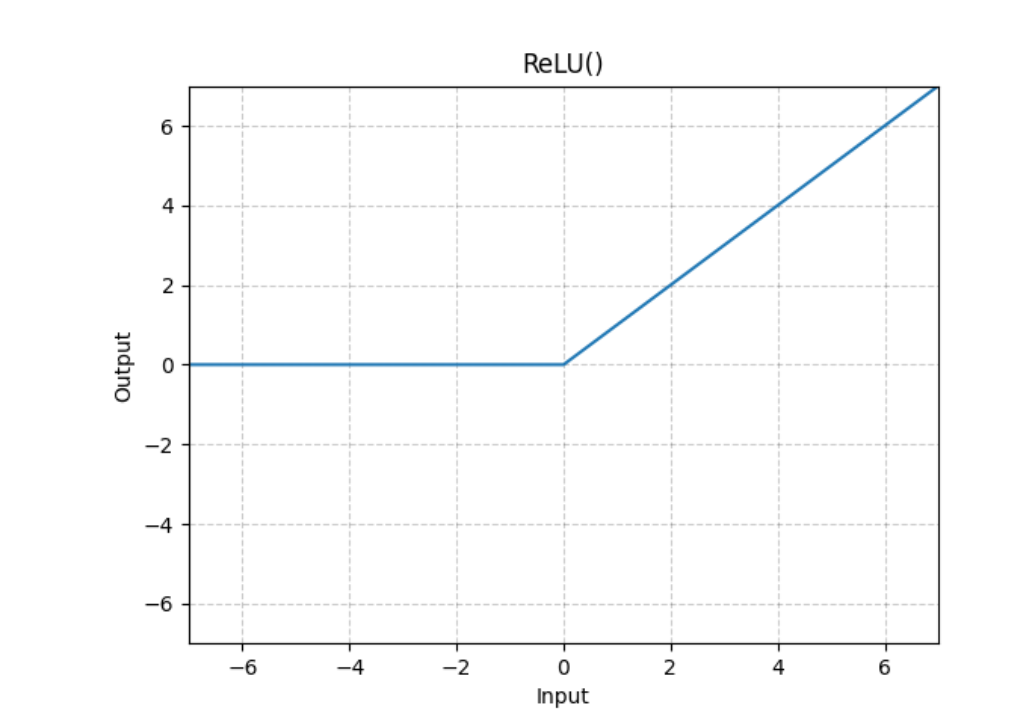

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(sparse_matrix, np.array(dataframe['stars']))
x_train, x_val, y_train, y_val = train_test_split(sparse_matrix, np.array(dataframe['stars']))

x_train = Variable(torch.from_numpy(x_train)).float()
y_train = Variable(torch.from_numpy(y_train)).long()
x_test = Variable(torch.from_numpy(x_test)).float()
y_test = Variable(torch.from_numpy(y_test)).long()
x_valid = Variable(torch.from_numpy(x_val)).float()
y_valid = Variable(torch.from_numpy(y_val)).long()

train_dataset = TensorDataset(x_train, y_train)
valid_dataset = TensorDataset(x_valid, y_valid)
test_dataset = TensorDataset(x_test, y_test)

splitting the date set for further training

In [ ]:
model = LogisticRegression()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model.parameters() , lr=0.01)
learning_rates = [0.001, 0.01, 0.1]
batch_sizes = [16, 32, 64]
epochs = 21
loss_values, models = [], []

parameters for training and AI and normal plotting in the future

Batch size: 16
learning_rate: 0.001
Epoch 1/21, Training Loss: 1.5190, Training Accuracy: 0.3250, Validation Loss: 1.3543, Validation Accuracy: 0.4457
Epoch 2/21, Training Loss: 1.0130, Training Accuracy: 0.5974, Validation Loss: 1.4485, Validation Accuracy: 0.4529
Epoch 3/21, Training Loss: 0.4619, Training Accuracy: 0.8404, Validation Loss: 2.1211, Validation Accuracy: 0.4334
Epoch 4/21, Training Loss: 0.1709, Training Accuracy: 0.9539, Validation Loss: 2.9088, Validation Accuracy: 0.4314
Epoch 5/21, Training Loss: 0.0583, Training Accuracy: 0.9877, Validation Loss: 3.7104, Validation Accuracy: 0.4180
Epoch 6/21, Training Loss: 0.0235, Training Accuracy: 0.9956, Validation Loss: 4.0661, Validation Accuracy: 0.4314
Epoch 7/21, Training Loss: 0.0129, Training Accuracy: 0.9979, Validation Loss: 4.1914, Validation Accuracy: 0.4273
Epoch 8/21, Training Loss: 0.0058, Training Accuracy: 0.9990, Validation Loss: 4.5267, Validation Accuracy: 0.4211
Epoch 9/21, Training Loss: 0.0037, Training 

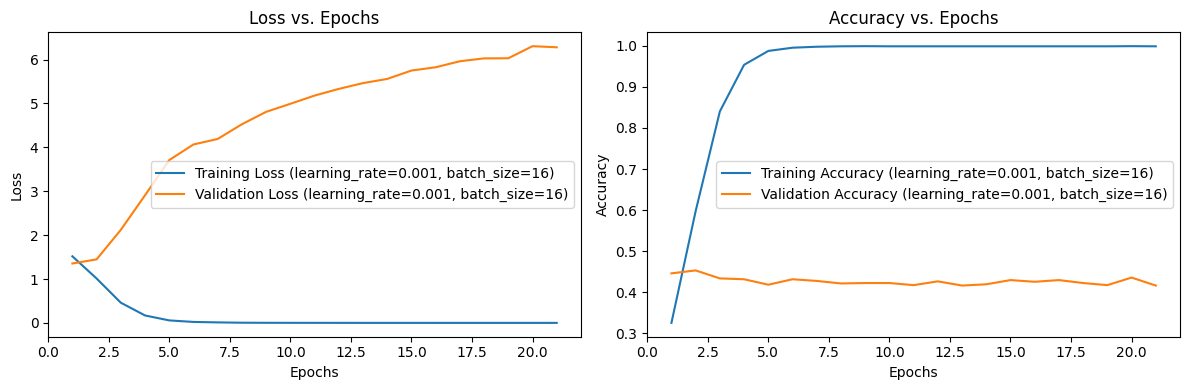

Batch size: 32
learning_rate: 0.001
Epoch 1/21, Training Loss: 0.0030, Training Accuracy: 0.9986, Validation Loss: 7.2907, Validation Accuracy: 0.4160
Epoch 2/21, Training Loss: 0.0233, Training Accuracy: 0.9945, Validation Loss: 7.7921, Validation Accuracy: 0.4221
Epoch 3/21, Training Loss: 0.0259, Training Accuracy: 0.9949, Validation Loss: 6.4829, Validation Accuracy: 0.4232
Epoch 4/21, Training Loss: 0.0045, Training Accuracy: 0.9983, Validation Loss: 6.7199, Validation Accuracy: 0.4211
Epoch 5/21, Training Loss: 0.0061, Training Accuracy: 0.9979, Validation Loss: 6.9709, Validation Accuracy: 0.4109
Epoch 6/21, Training Loss: 0.0045, Training Accuracy: 0.9979, Validation Loss: 6.9219, Validation Accuracy: 0.4273
Epoch 7/21, Training Loss: 0.0052, Training Accuracy: 0.9986, Validation Loss: 7.0870, Validation Accuracy: 0.4221
Epoch 8/21, Training Loss: 0.0019, Training Accuracy: 0.9990, Validation Loss: 6.9779, Validation Accuracy: 0.4283
Epoch 9/21, Training Loss: 0.0014, Training 

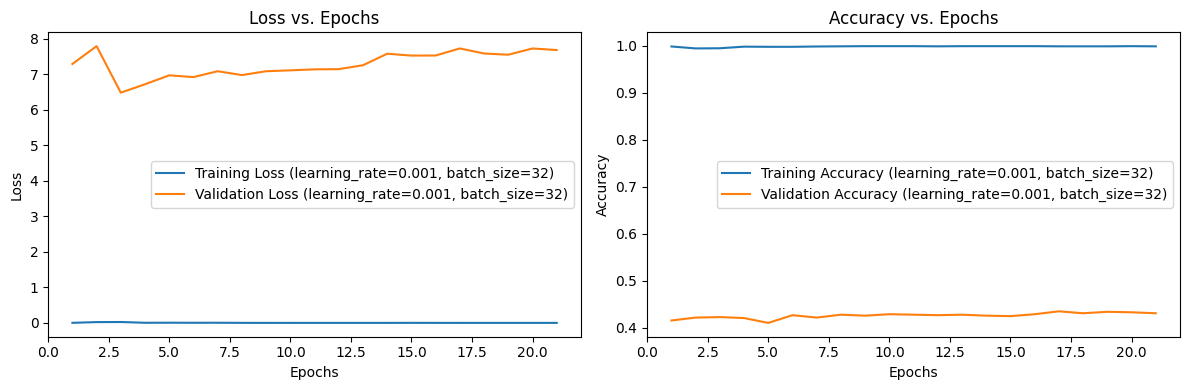

Batch size: 64
learning_rate: 0.001
Epoch 1/21, Training Loss: 0.0021, Training Accuracy: 0.9990, Validation Loss: 9.5626, Validation Accuracy: 0.4232
Epoch 2/21, Training Loss: 0.0046, Training Accuracy: 0.9986, Validation Loss: 9.8226, Validation Accuracy: 0.4057
Epoch 3/21, Training Loss: 0.0053, Training Accuracy: 0.9983, Validation Loss: 9.1744, Validation Accuracy: 0.4139
Epoch 4/21, Training Loss: 0.0013, Training Accuracy: 0.9990, Validation Loss: 9.0667, Validation Accuracy: 0.4324
Epoch 5/21, Training Loss: 0.0015, Training Accuracy: 0.9993, Validation Loss: 9.7660, Validation Accuracy: 0.4283
Epoch 6/21, Training Loss: 0.0014, Training Accuracy: 0.9990, Validation Loss: 9.9355, Validation Accuracy: 0.4344
Epoch 7/21, Training Loss: 0.0013, Training Accuracy: 0.9993, Validation Loss: 9.7562, Validation Accuracy: 0.4324
Epoch 8/21, Training Loss: 0.0014, Training Accuracy: 0.9990, Validation Loss: 9.8771, Validation Accuracy: 0.4314
Epoch 9/21, Training Loss: 0.0014, Training 

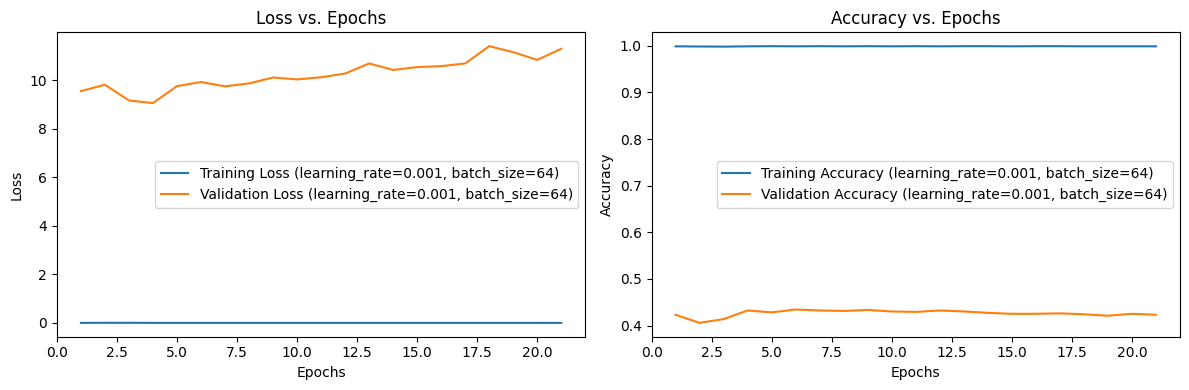

Batch size: 16
learning_rate: 0.01
Epoch 1/21, Training Loss: 0.9121, Training Accuracy: 0.7468, Validation Loss: 1.9976, Validation Accuracy: 0.3832
Epoch 2/21, Training Loss: 0.4887, Training Accuracy: 0.8465, Validation Loss: 2.4821, Validation Accuracy: 0.3770
Epoch 3/21, Training Loss: 0.2474, Training Accuracy: 0.9364, Validation Loss: 2.5648, Validation Accuracy: 0.3811
Epoch 4/21, Training Loss: 0.1312, Training Accuracy: 0.9737, Validation Loss: 4.1515, Validation Accuracy: 0.3852
Epoch 5/21, Training Loss: 0.1138, Training Accuracy: 0.9737, Validation Loss: 4.2789, Validation Accuracy: 0.4109
Epoch 6/21, Training Loss: 0.1545, Training Accuracy: 0.9713, Validation Loss: 3.2559, Validation Accuracy: 0.3965
Epoch 7/21, Training Loss: 0.2047, Training Accuracy: 0.9655, Validation Loss: 3.6925, Validation Accuracy: 0.3668
Epoch 8/21, Training Loss: 0.2391, Training Accuracy: 0.9460, Validation Loss: 2.8584, Validation Accuracy: 0.4098
Epoch 9/21, Training Loss: 0.0935, Training A

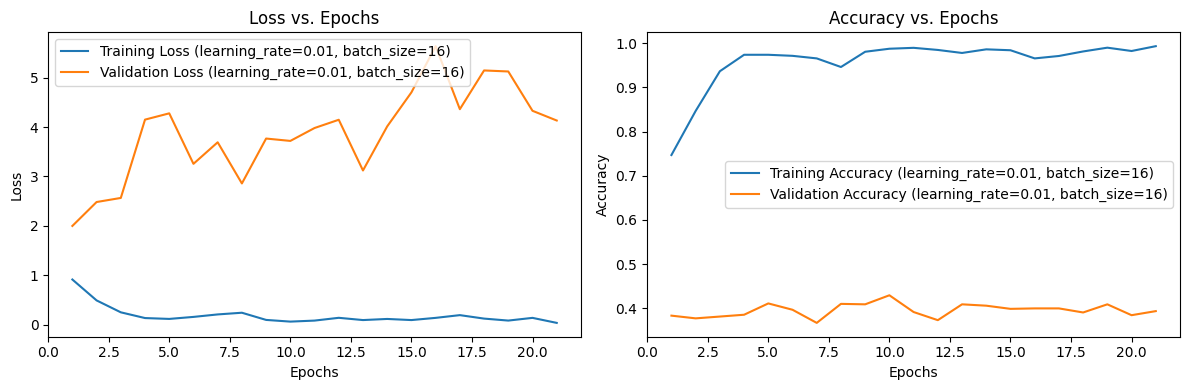

Batch size: 32
learning_rate: 0.01
Epoch 1/21, Training Loss: 0.0727, Training Accuracy: 0.9928, Validation Loss: 13.6711, Validation Accuracy: 0.3965
Epoch 2/21, Training Loss: 0.1017, Training Accuracy: 0.9932, Validation Loss: 9.7038, Validation Accuracy: 0.3945
Epoch 3/21, Training Loss: 0.0631, Training Accuracy: 0.9908, Validation Loss: 10.0053, Validation Accuracy: 0.3852
Epoch 4/21, Training Loss: 0.1927, Training Accuracy: 0.9856, Validation Loss: 9.4300, Validation Accuracy: 0.3719
Epoch 5/21, Training Loss: 0.2165, Training Accuracy: 0.9853, Validation Loss: 11.2113, Validation Accuracy: 0.3873
Epoch 6/21, Training Loss: 0.1492, Training Accuracy: 0.9925, Validation Loss: 7.8102, Validation Accuracy: 0.3842
Epoch 7/21, Training Loss: 0.1115, Training Accuracy: 0.9891, Validation Loss: 8.2699, Validation Accuracy: 0.4057
Epoch 8/21, Training Loss: 0.0619, Training Accuracy: 0.9942, Validation Loss: 10.4355, Validation Accuracy: 0.3965
Epoch 9/21, Training Loss: 0.1777, Traini

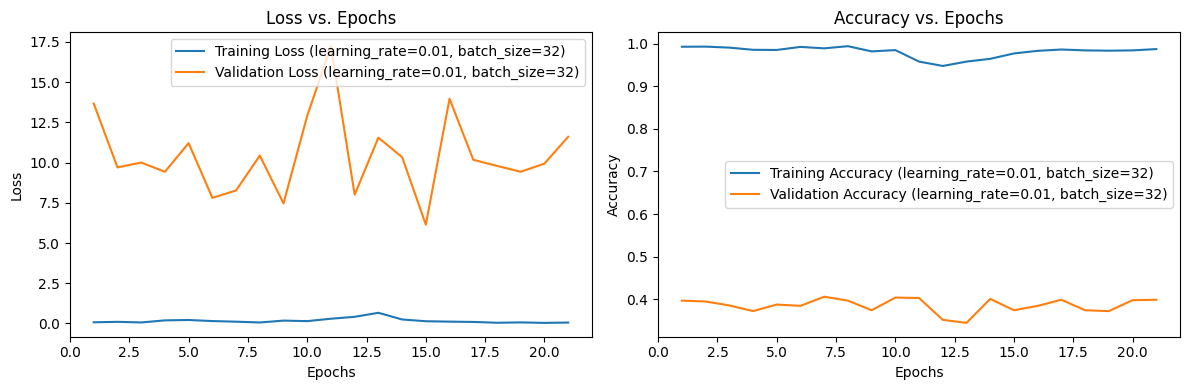

Batch size: 64
learning_rate: 0.01
Epoch 1/21, Training Loss: 0.0316, Training Accuracy: 0.9901, Validation Loss: 25.6129, Validation Accuracy: 0.3955
Epoch 2/21, Training Loss: 0.0279, Training Accuracy: 0.9901, Validation Loss: 29.9800, Validation Accuracy: 0.4109
Epoch 3/21, Training Loss: 0.0251, Training Accuracy: 0.9901, Validation Loss: 29.4480, Validation Accuracy: 0.3975
Epoch 4/21, Training Loss: 0.0250, Training Accuracy: 0.9894, Validation Loss: 32.2431, Validation Accuracy: 0.4037
Epoch 5/21, Training Loss: 0.1166, Training Accuracy: 0.9897, Validation Loss: 48.4953, Validation Accuracy: 0.3975
Epoch 6/21, Training Loss: 0.1398, Training Accuracy: 0.9891, Validation Loss: 43.9208, Validation Accuracy: 0.3955
Epoch 7/21, Training Loss: 0.1908, Training Accuracy: 0.9870, Validation Loss: 26.5576, Validation Accuracy: 0.4262
Epoch 8/21, Training Loss: 0.1067, Training Accuracy: 0.9877, Validation Loss: 41.0629, Validation Accuracy: 0.3934
Epoch 9/21, Training Loss: 0.1130, Tr

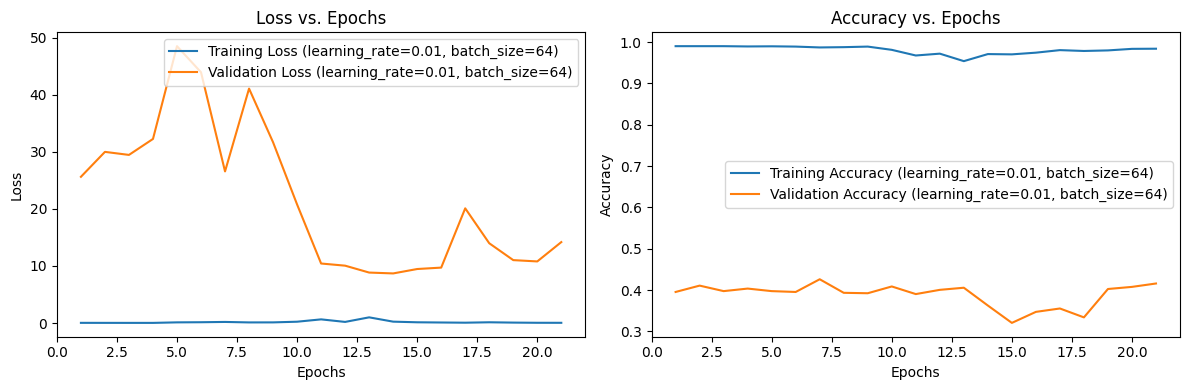

Batch size: 16
learning_rate: 0.1
Epoch 1/21, Training Loss: 1.8776, Training Accuracy: 0.3910, Validation Loss: 1.5933, Validation Accuracy: 0.2541
Epoch 2/21, Training Loss: 1.6016, Training Accuracy: 0.2461, Validation Loss: 1.6021, Validation Accuracy: 0.2541
Epoch 3/21, Training Loss: 1.6014, Training Accuracy: 0.2611, Validation Loss: 1.5938, Validation Accuracy: 0.2613
Epoch 4/21, Training Loss: 1.6058, Training Accuracy: 0.2546, Validation Loss: 1.6285, Validation Accuracy: 0.2541
Epoch 5/21, Training Loss: 1.5983, Training Accuracy: 0.2553, Validation Loss: 1.5929, Validation Accuracy: 0.2541
Epoch 6/21, Training Loss: 1.6003, Training Accuracy: 0.2488, Validation Loss: 1.6032, Validation Accuracy: 0.2613
Epoch 7/21, Training Loss: 1.6031, Training Accuracy: 0.2461, Validation Loss: 1.6001, Validation Accuracy: 0.2541
Epoch 8/21, Training Loss: 1.6011, Training Accuracy: 0.2591, Validation Loss: 1.6105, Validation Accuracy: 0.2541
Epoch 9/21, Training Loss: 1.6007, Training Ac

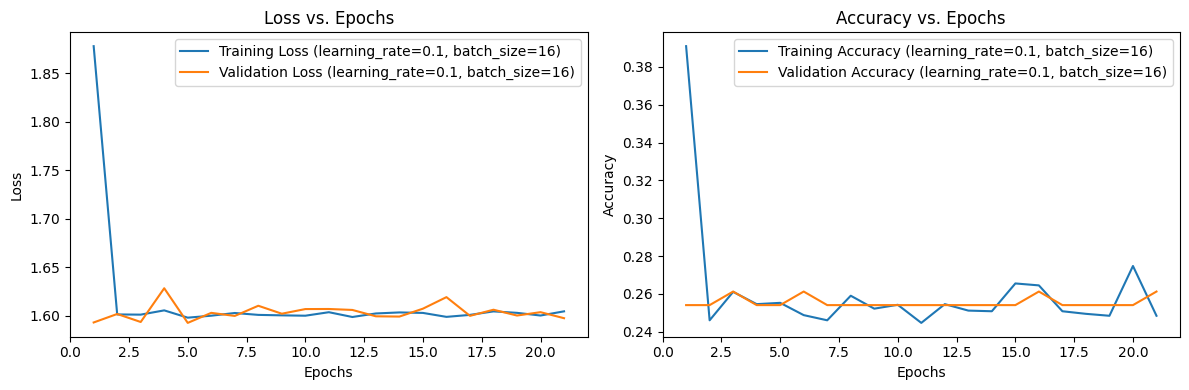

Batch size: 32
learning_rate: 0.1
Epoch 1/21, Training Loss: 1.5968, Training Accuracy: 0.2468, Validation Loss: 1.5952, Validation Accuracy: 0.2541
Epoch 2/21, Training Loss: 1.5963, Training Accuracy: 0.2495, Validation Loss: 1.5982, Validation Accuracy: 0.2541
Epoch 3/21, Training Loss: 1.5975, Training Accuracy: 0.2652, Validation Loss: 1.6138, Validation Accuracy: 0.2613
Epoch 4/21, Training Loss: 1.5993, Training Accuracy: 0.2584, Validation Loss: 1.5944, Validation Accuracy: 0.2541
Epoch 5/21, Training Loss: 1.5926, Training Accuracy: 0.2570, Validation Loss: 1.5971, Validation Accuracy: 0.2541
Epoch 6/21, Training Loss: 1.5963, Training Accuracy: 0.2532, Validation Loss: 1.5945, Validation Accuracy: 0.2541
Epoch 7/21, Training Loss: 1.5965, Training Accuracy: 0.2560, Validation Loss: 1.5991, Validation Accuracy: 0.2613
Epoch 8/21, Training Loss: 1.5984, Training Accuracy: 0.2553, Validation Loss: 1.5958, Validation Accuracy: 0.2541
Epoch 9/21, Training Loss: 1.6021, Training Ac

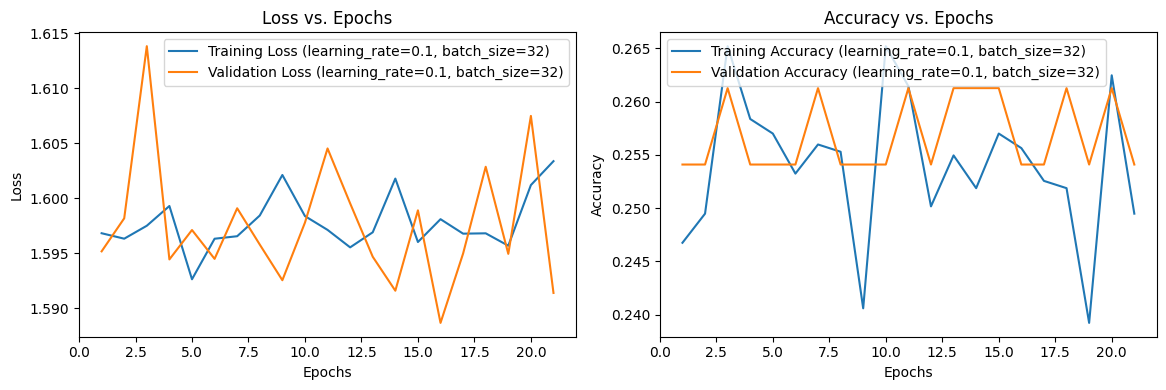

Batch size: 64
learning_rate: 0.1
Epoch 1/21, Training Loss: 1.5961, Training Accuracy: 0.2532, Validation Loss: 1.6009, Validation Accuracy: 0.2541
Epoch 2/21, Training Loss: 1.5951, Training Accuracy: 0.2502, Validation Loss: 1.6063, Validation Accuracy: 0.2541
Epoch 3/21, Training Loss: 1.5953, Training Accuracy: 0.2478, Validation Loss: 1.5868, Validation Accuracy: 0.2541
Epoch 4/21, Training Loss: 1.5951, Training Accuracy: 0.2570, Validation Loss: 1.5953, Validation Accuracy: 0.2541
Epoch 5/21, Training Loss: 1.5947, Training Accuracy: 0.2560, Validation Loss: 1.5859, Validation Accuracy: 0.2541
Epoch 6/21, Training Loss: 1.5909, Training Accuracy: 0.2614, Validation Loss: 1.5968, Validation Accuracy: 0.2541
Epoch 7/21, Training Loss: 1.5947, Training Accuracy: 0.2567, Validation Loss: 1.5963, Validation Accuracy: 0.2541
Epoch 8/21, Training Loss: 1.5994, Training Accuracy: 0.2450, Validation Loss: 1.5866, Validation Accuracy: 0.2613
Epoch 9/21, Training Loss: 1.5960, Training Ac

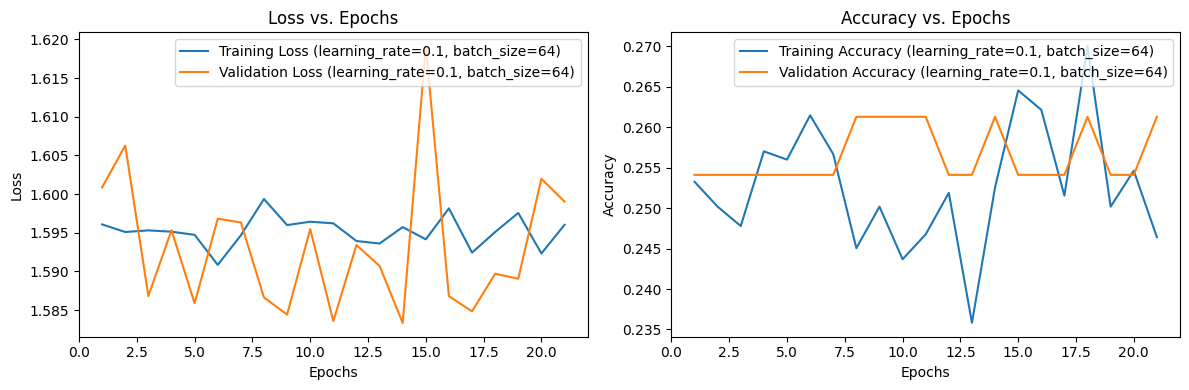

In [ ]:
for learning_rate in learning_rates:
    for batch_size in batch_sizes:
        criterion = nn.CrossEntropyLoss()
        optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

        train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
        valid_loader = DataLoader(valid_dataset, batch_size=batch_size, shuffle=True)
        test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

        train_losses = []
        valid_losses = []
        train_accuracy = []
        valid_accuracy = []
        print(f"Batch size: {batch_size}")
        print(f"learning_rate: {learning_rate}")
        for epoch in range(epochs):
            model.train()

            cur_loss = 0.0
            correct_guesses = 0
            total_guesses = 0

            for inputs, labels in train_loader:
                optimizer.zero_grad()
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                loss.backward()
                optimizer.step()

                cur_loss += loss.item()

                _, predicted = torch.max(outputs, 1)
                total_guesses += labels.size(0)
                correct_guesses += (predicted == labels).sum().item()

            train_losses.append(cur_loss / len(train_loader))
            train_accuracy.append(correct_guesses / total_guesses)

            # Validation
            model.eval()

            cur_loss = 0.0
            correct_valid = 0
            total_valid = 0

            with torch.no_grad():
                for inputs, labels in valid_loader:
                    outputs = model(inputs)
                    loss = criterion(outputs, labels)
                    cur_loss += loss.item()

                    _, predicted = torch.max(outputs, 1)
                    total_valid += labels.size(0)
                    correct_valid += (predicted == labels).sum().item()

                valid_losses.append(cur_loss / len(valid_loader))
                valid_accuracy.append(correct_valid / total_valid)
                print(f'Epoch {epoch + 1}/{epochs}, '
                      f'Training Loss: {train_losses[-1]:.4f}, Training Accuracy: {train_accuracy[-1]:.4f}, '
                      f'Validation Loss: {valid_losses[-1]:.4f}, Validation Accuracy: {valid_accuracy[-1]:.4f}')
                models.append(model)

        # Visualization
        plt.figure(figsize=(12, 4))

        plt.subplot(1, 2, 1)
        plt.plot(range(1, epochs + 1), train_losses, label=f'Training Loss (learning_rate={learning_rate}, batch_size={batch_size})')
        plt.plot(range(1, epochs + 1), valid_losses, label=f'Validation Loss (learning_rate={learning_rate}, batch_size={batch_size})')
        plt.legend()
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.title('Loss vs. Epochs')

        plt.subplot(1, 2, 2)
        plt.plot(range(1, epochs + 1), train_accuracy, label=f'Training Accuracy (learning_rate={learning_rate}, batch_size={batch_size})')
        plt.plot(range(1, epochs + 1), valid_accuracy, label=f'Validation Accuracy (learning_rate={learning_rate}, batch_size={batch_size})')
        plt.legend()
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.title('Accuracy vs. Epochs')

        plt.tight_layout()
        plt.show()

Let's explain the code above

train loop in which the size of the batch and the learning rate are sorted. A date is created inside the outer loop to store losses and accuracy

In [ ]:
for learning_rate in learning_rates:
    for batch_size in batch_sizes:
        criterion = nn.CrossEntropyLoss()
        optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

        train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
        valid_loader = DataLoader(valid_dataset, batch_size=batch_size, shuffle=True)
        test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

        train_losses = []
        valid_losses = []
        train_accuracy = []
        valid_accuracy = []
        print(f"Batch size: {batch_size}")
        print(f"learning_rate: {learning_rate}")

starting training and counting losses

In [ ]:
for epoch in range(epochs):
            model.train()

            cur_loss = 0.0
            correct_guesses = 0
            total_guesses = 0

            for inputs, labels in train_loader:
                optimizer.zero_grad()
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                loss.backward()
                optimizer.step()

                cur_loss += loss.item()

                _, predicted = torch.max(outputs, 1)
                total_guesses += labels.size(0)
                correct_guesses += (predicted == labels).sum().item()

            train_losses.append(cur_loss / len(train_loader))
            train_accuracy.append(correct_guesses / total_guesses)

the beginning of validation

In [ ]:
with torch.no_grad():
                for inputs, labels in valid_loader:
                    outputs = model(inputs)
                    loss = criterion(outputs, labels)
                    cur_loss += loss.item()

                    _, predicted = torch.max(outputs, 1)
                    total_valid += labels.size(0)
                    correct_valid += (predicted == labels).sum().item()

                valid_losses.append(cur_loss / len(valid_loader))
                valid_accuracy.append(correct_valid / total_valid)
                print(f'Epoch {epoch + 1}/{epochs}, '
                      f'Training Loss: {train_losses[-1]:.4f}, Training Accuracy: {train_accuracy[-1]:.4f}, '
                      f'Validation Loss: {valid_losses[-1]:.4f}, Validation Accuracy: {valid_accuracy[-1]:.4f}')
                models.append(model)

plotting based on the received data

In [ ]:
 plt.figure(figsize=(12, 4))

        plt.subplot(1, 2, 1)
        plt.plot(range(1, epochs + 1), train_losses, label=f'Training Loss (learning_rate={learning_rate}, batch_size={batch_size})')
        plt.plot(range(1, epochs + 1), valid_losses, label=f'Validation Loss (learning_rate={learning_rate}, batch_size={batch_size})')
        plt.legend()
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.title('Loss vs. Epochs')

        plt.subplot(1, 2, 2)
        plt.plot(range(1, epochs + 1), train_accuracy, label=f'Training Accuracy (learning_rate={learning_rate}, batch_size={batch_size})')
        plt.plot(range(1, epochs + 1), valid_accuracy, label=f'Validation Accuracy (learning_rate={learning_rate}, batch_size={batch_size})')
        plt.legend()
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.title('Accuracy vs. Epochs')

после проделанной работы можно сделать выводы. мы видим, что на текстовой информации ии обучается крайне неохотно. мое предположение это из-за того, что не хватает дата данных, огромные потери подтверждают это. по сути ии просто запоминает то что ей дается на изучение и при работе с новыми данными, он их не узнает. пытался добавлять новые слои и увеличивать количество нейронов вширь, но к сожалению становилось только хуже. Так же затрудняет процесс, что на выходе 6 нейронов, которые должны определить именно звезду, а не что такое хорошо, а что такое плохо. Для достижения лучших результатов могу предложить:

1 - увеличить базу данных

2 - улучшить работу с текстом и работа не только с векторами слов, а с контекстом и тп